In [1]:
import torchvision.models as models
from torch import nn
import torch
from models.adain_sf import AdaINTransfer
import os
from PIL import Image
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image
from data.unnormalize import UnNormalize

In [13]:
content_image = Image.open("./content_test.jpg").convert("RGB")
style_image = Image.open("./style_test.jpg").convert("RGB")

In [14]:
transform = transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.ToTensor(),
            # transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
        ])

In [15]:
content = transform(content_image).unsqueeze(0)
style = transform(style_image).unsqueeze(0)

In [16]:
model = AdaINTransfer(add_bn = True)

In [17]:
model.load_state_dict(torch.load("./checkpoints/last_model_trained_159999.pt")["model_state_dict"])

<All keys matched successfully>

In [18]:
model.eval()
with torch.no_grad():
    output = model.style_transfer(content, style, alpha = 0.7)

In [19]:
image = to_pil_image(output.squeeze(0))

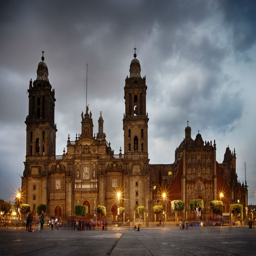

In [23]:
content_image.resize((256, 256))

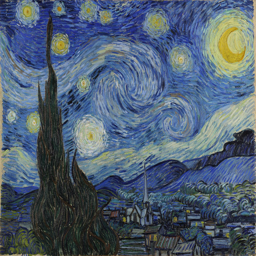

In [25]:
style_image.resize((256, 256))

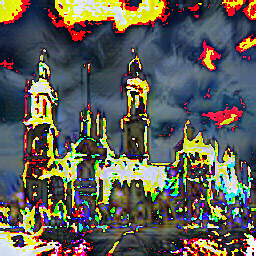

In [26]:
image